# Outliers

***An outlier is a data point that significantly deviates from other observations.***

*We can Handle(Trim or Cap) Outliers using:*

1. **Z-Score Method**
2. **IQR Method**
3. **Percentile Method**

In [194]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
df = pd.read_csv('placements.csv')

df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


# 1. Z-Score Method

***The Z-score method handles outliers by measuring a data point's distance from the mean in units of standard deviation (σ). Data points falling outside a certain threshold (typically ±3σ) are flagged as outliers and are either trimmed or capped.***

**Key Details :**

* **Formula**: Z= (x−μ)/σ  (where x is the data point, μ is the mean, and σ is the standard deviation).
* **Assumption**: It works best when the data is assumed to follow a normal (Gaussian) distribution.
* **Threshold**: The common cutoff for an outlier is a Z-score greater than 3 or less than -3.

In [196]:
# getting limits 
df['cgpa_std'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

## Trimming

In [197]:
df_1a = df.copy()

In [198]:
df_1a = df[(df['cgpa_std']>= - 3) & (df['cgpa_std'] <= 3)]

### 5 number summary

In [199]:
print("Before Trimming - zscore:\n",df['cgpa'].describe())
print("After Trimming - zscore:\n",df_1a['cgpa'].describe())

Before Trimming - zscore:
 count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64
After Trimming - zscore:
 count    995.000000
mean       6.963357
std        0.600082
min        5.230000
25%        6.550000
50%        6.960000
75%        7.365000
max        8.620000
Name: cgpa, dtype: float64


### Distribution

Text(0.5, 1.0, 'Z-score - After Trimming')

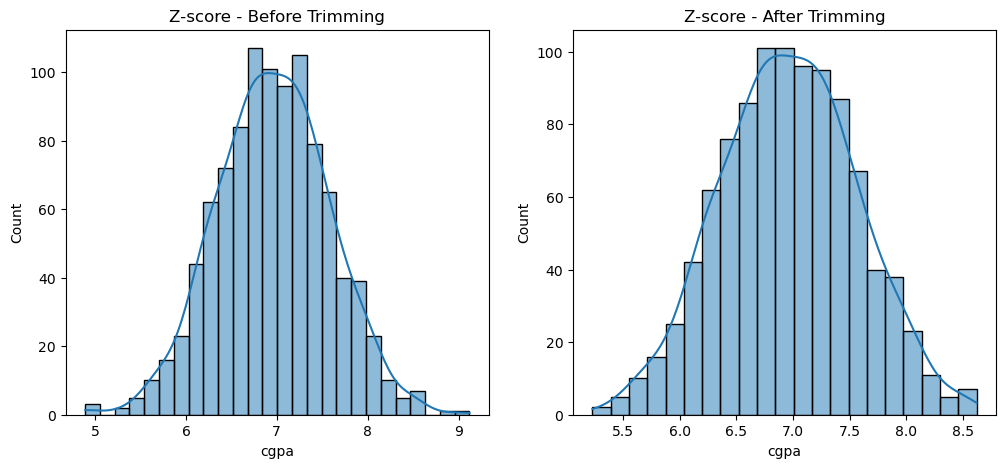

In [200]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde = True)
plt.title("Z-score - Before Trimming")

plt.subplot(1,2,2)
sns.histplot(df_1a['cgpa'], kde = True)
plt.title("Z-score - After Trimming")

### Box plot

Text(0.5, 1.0, 'Z-score - After Trimming')

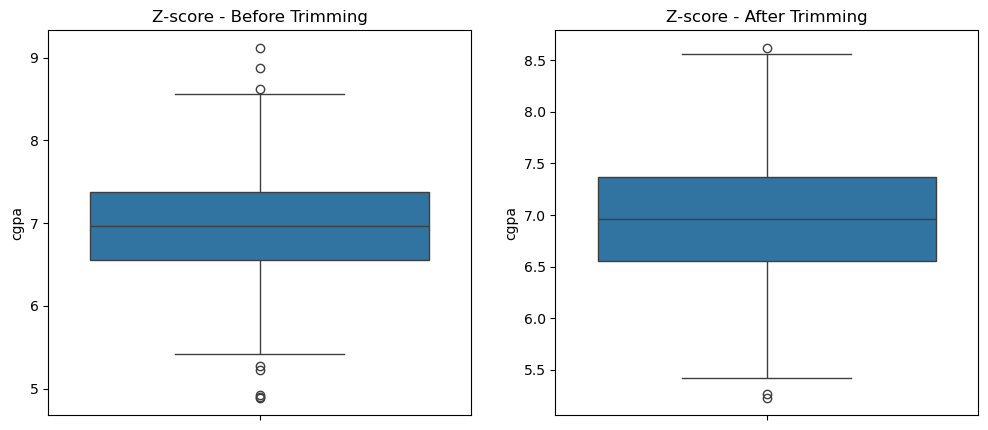

In [201]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.boxplot(df['cgpa'])
plt.title("Z-score - Before Trimming")

plt.subplot(1,2,2)
sns.boxplot(df_1a['cgpa'])
plt.title("Z-score - After Trimming")

## Capping

In [202]:
df_1b = df.copy()

In [203]:
upper_limit = df_1b['cgpa'].mean() + (3 * df_1b['cgpa'].std())
lower_limit = df_1b['cgpa'].mean() - (3 * df_1b['cgpa'].std())

df_1b['cgpa'] = np.where(df_1b['cgpa']>upper_limit,
                        upper_limit,
                        np.where(df_1b['cgpa']<lower_limit,
                                lower_limit,
                                df_1b['cgpa']))

### 5 number summary

In [204]:
print("Before Capping - zscore\n",df['cgpa'].describe())
print("After Capping - zscore\n",df_1b['cgpa'].describe())

Before Capping - zscore
 count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64
After Capping - zscore
 count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64


### Distribution

Text(0.5, 1.0, 'Z-score - After capping')

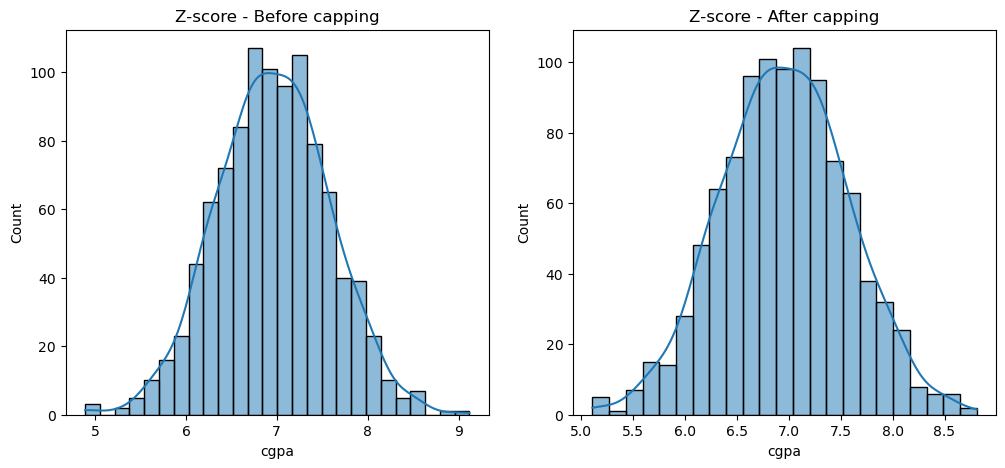

In [205]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde = True)
plt.title("Z-score - Before capping")

plt.subplot(1,2,2)
sns.histplot(df_1b['cgpa'], kde = True)
plt.title("Z-score - After capping")

### Box plot

Text(0.5, 1.0, 'Z-score - After Capping')

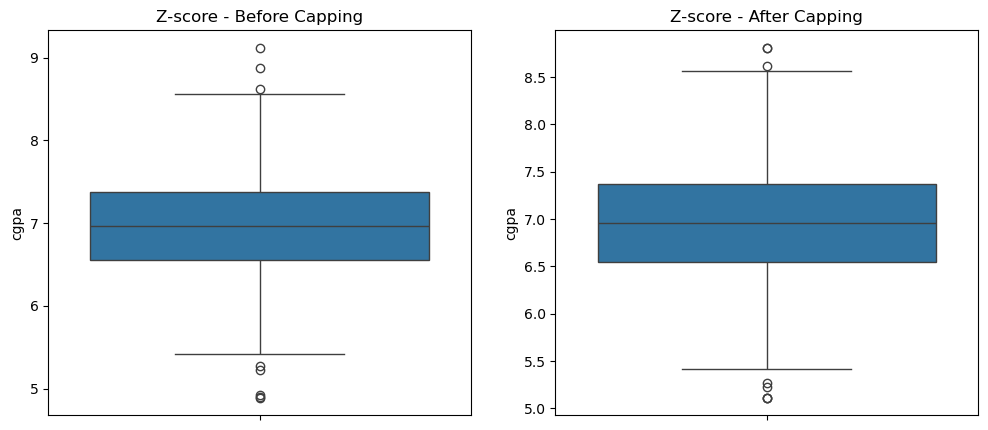

In [206]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.boxplot(df['cgpa'])
plt.title("Z-score - Before Capping")

plt.subplot(1,2,2)
sns.boxplot(df_1b['cgpa'])
plt.title("Z-score - After Capping")

# 2. IQR Method

***The IQR method handles outliers by defining fences (or limits) based on the Interquartile Range (IQR), which is the difference between the 75th percentile (Q3) and the 25th percentile (Q1). Data points falling outside these fences (typically 1.5×IQR below Q1 or above Q3) are flagged as outliers and subsequently trimmed or capped.***

**Key Details**:
* **Formula**: IQR=Q3−Q1.
* **Fences** (Outlier Cutoffs):
    * *Lower Fence*: Q1−(1.5×IQR)
    * *Upper Fence*: Q3+(1.5×IQR)
* **Assumption**: It is distribution-agnostic (it does not require the data to be normally distributed), making it more robust than the Z-score method, especially for skewed data.
* **Visualization**: This method is best visualized using a Box Plot.

In [207]:
Q1 = df['placement_exam_marks'].quantile(0.25)
Q3 = df['placement_exam_marks'].quantile(0.75)

IQR = Q3 - Q1

lower_limit_iqr = Q1 - 1.5*IQR
upper_limit_iqr = Q3 + 1.5*IQR

## Trimming

In [208]:
df_2a = df.copy()

In [209]:
df_2a = df_2a[(df_2a['placement_exam_marks']>= lower_limit_iqr) & (df_2a['placement_exam_marks']<= upper_limit_iqr)]

### 5 number summary

In [210]:
print("Before Trimming - IQR:\n",df['placement_exam_marks'].describe())
print("After Trimming - IQR:\n",df_2a['placement_exam_marks'].describe())

Before Trimming - IQR:
 count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64
After Trimming - IQR:
 count    985.000000
mean      31.339086
std       17.857633
min        0.000000
25%       17.000000
50%       28.000000
75%       43.000000
max       83.000000
Name: placement_exam_marks, dtype: float64


### Distribution

Text(0.5, 1.0, 'IQR - After Trimming')

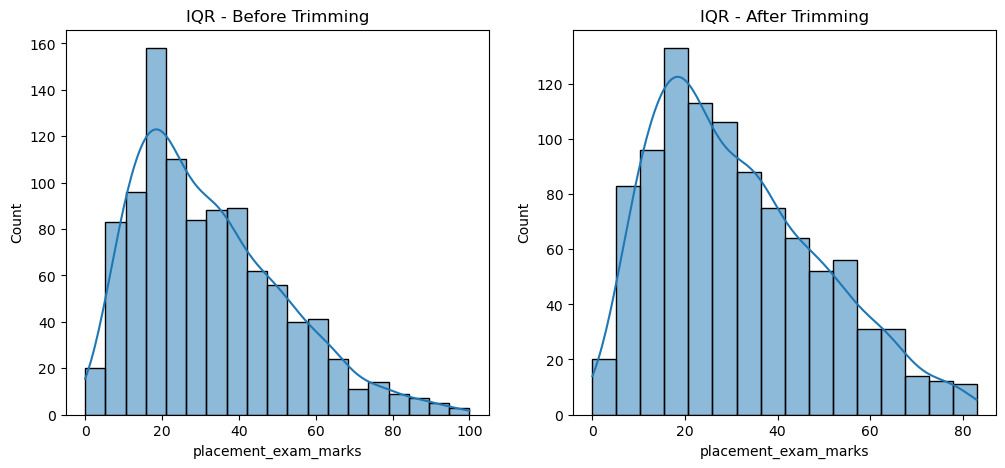

In [211]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.histplot(df['placement_exam_marks'], kde = True)
plt.title("IQR - Before Trimming")

plt.subplot(1,2,2)
sns.histplot(df_2a['placement_exam_marks'], kde = True)
plt.title("IQR - After Trimming")

### Box plot

Text(0.5, 1.0, 'IQR - After Trimming')

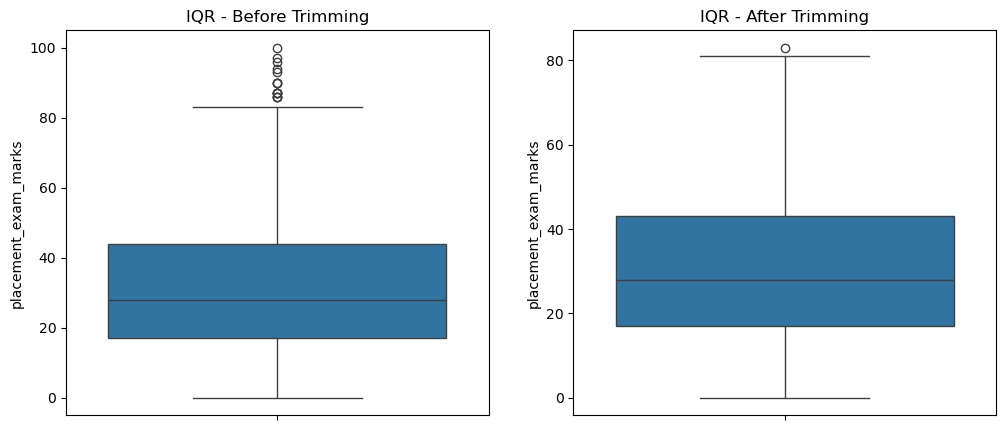

In [212]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.boxplot(df['placement_exam_marks'])
plt.title("IQR - Before Trimming")

plt.subplot(1,2,2)
sns.boxplot(df_2a['placement_exam_marks'])
plt.title("IQR - After Trimming")

## Capping

In [213]:
df_2b = df.copy()

In [214]:
df_2b['placement_exam_marks'] = np.where(df_2b['placement_exam_marks']>upper_limit_iqr,
                                        upper_limit_iqr,
                                        np.where(df_2b['placement_exam_marks']<lower_limit_iqr,
                                                lower_limit_iqr,
                                                df_2b['placement_exam_marks']))

### 5 number summary

In [215]:
print("Before Capping - IQR:\n",df['placement_exam_marks'].describe())
print("After Capping - IQR:\n",df_2b['placement_exam_marks'].describe())

Before Capping - IQR:
 count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64
After Capping - IQR:
 count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: placement_exam_marks, dtype: float64


### Distribution

Text(0.5, 1.0, 'IQR - After Capping')

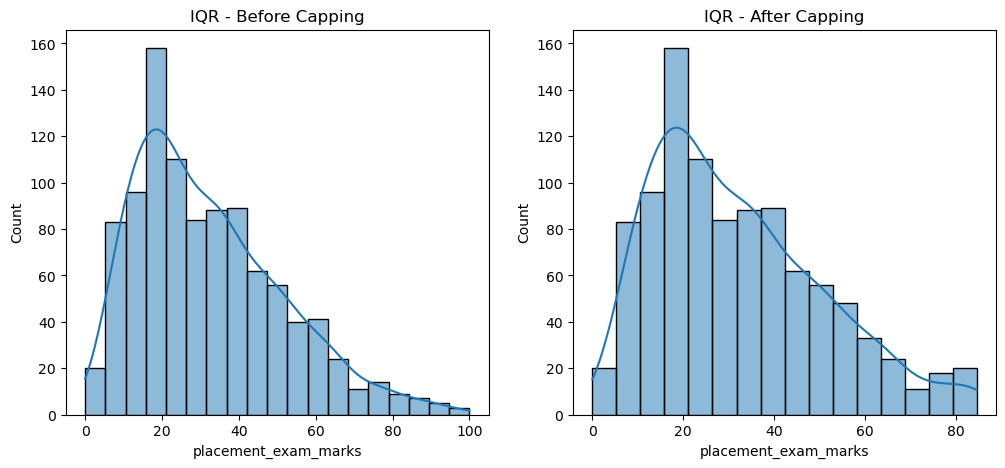

In [216]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.histplot(df['placement_exam_marks'], kde = True)
plt.title("IQR - Before Capping")

plt.subplot(1,2,2)
sns.histplot(df_2b['placement_exam_marks'], kde = True)
plt.title("IQR - After Capping")

### Box plot

Text(0.5, 1.0, 'IQR - After Capping')

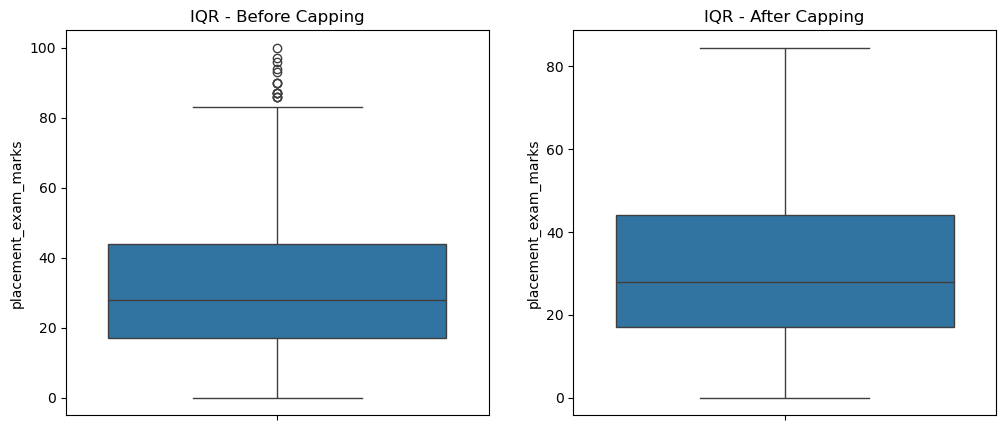

In [217]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.boxplot(df['placement_exam_marks'])
plt.title("IQR - Before Capping")

plt.subplot(1,2,2)
sns.boxplot(df_2b['placement_exam_marks'])
plt.title("IQR - After Capping")

# 3. Percentile Method

***The Percentile Method is an outlier handling technique that allows you to flexibly set custom thresholds by choosing specific percentiles (quantiles) of the data, such as the 1st and 99th percentiles. It identifies outliers as data points lying outside this chosen range, and then either caps (replaces) the extreme values with the percentile limit or trims (deletes) the entire data point.***

**Key Details:**
* **Distribution** : It doesn't rely on the data's mean or standard deviation (like Z-score), nor does it use a fixed multiple of spread (like 1.5×IQR).
* **Flexibility** : It's perfect for situations where you want to explicitly declare, for example, that the top 5% and bottom 5% of your data should be treated as outliers, regardless of the underlying distribution.

In [218]:
upper_limit_percentile = df['cgpa'].quantile(0.99)
lower_limit_percentile = df['cgpa'].quantile(0.01)

## Trimming

In [219]:
df_3a = df.copy()

In [220]:
df_3a = df_3a[(df_3a['cgpa']>= lower_limit_percentile) & (df_3a['cgpa']<= upper_limit_percentile)]

### 5 number summary

In [221]:
print("Before Trimming - Percentile:\n",df['cgpa'].describe())
print("After Trimming - Percentile:\n",df_3a['cgpa'].describe())

Before Trimming - Percentile:
 count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64
After Trimming - Percentile:
 count    980.000000
mean       6.961745
std        0.573327
min        5.560000
25%        6.557500
50%        6.960000
75%        7.360000
max        8.420000
Name: cgpa, dtype: float64


### Distribution

Text(0.5, 1.0, 'Percentile - After Trimming')

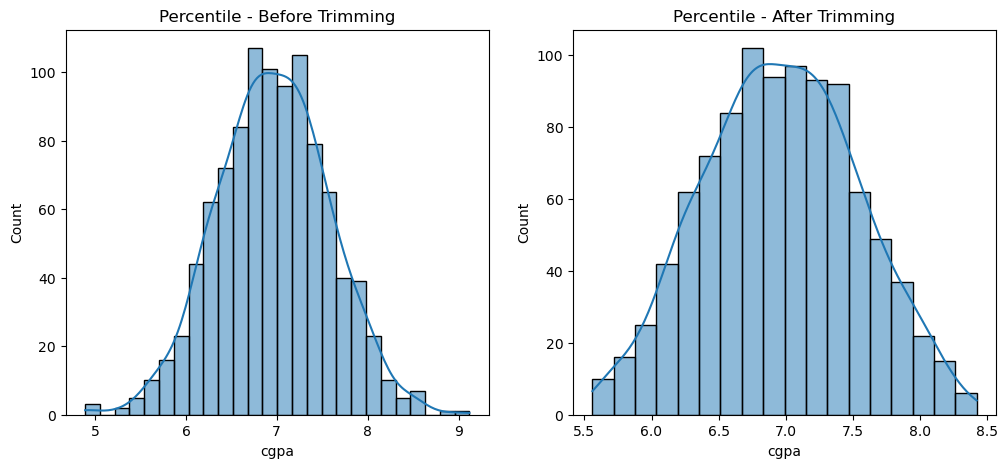

In [222]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde = True)
plt.title("Percentile - Before Trimming")

plt.subplot(1,2,2)
sns.histplot(df_3a['cgpa'], kde = True)
plt.title("Percentile - After Trimming")

### Box plot

Text(0.5, 1.0, 'Percentile - After Trimming')

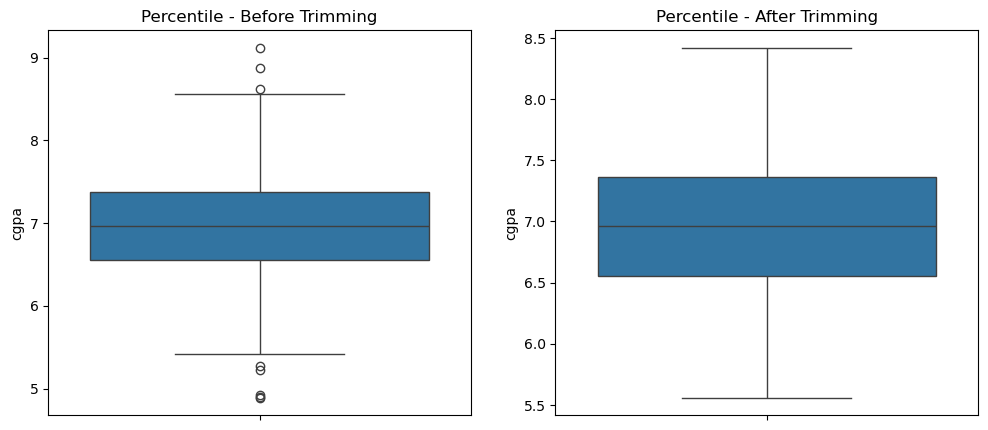

In [223]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.boxplot(df['cgpa'])
plt.title("Percentile - Before Trimming")

plt.subplot(1,2,2)
sns.boxplot(df_3a['cgpa'])
plt.title("Percentile - After Trimming")

## Capping (winsorization)

In [224]:
df_3b = df.copy()

In [225]:
df_3b['cgpa'] = np.where(df_3b['cgpa']<lower_limit_percentile,
                        lower_limit_percentile,
                        np.where(df_3b['cgpa']>upper_limit_percentile,
                                upper_limit_percentile,
                                df_3b['cgpa']))

### 5 number summary

In [226]:
print("Before Capping - Percentile:\n",df['cgpa'].describe())
print("After Capping - Percentile:\n",df_3b['cgpa'].describe())

Before Capping - Percentile:
 count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64
After Capping - Percentile:
 count    1000.000000
mean        6.962307
std         0.602571
min         5.559600
25%         6.550000
50%         6.960000
75%         7.370000
max         8.420100
Name: cgpa, dtype: float64


### Distribution

Text(0.5, 1.0, 'Percentile - After Capping')

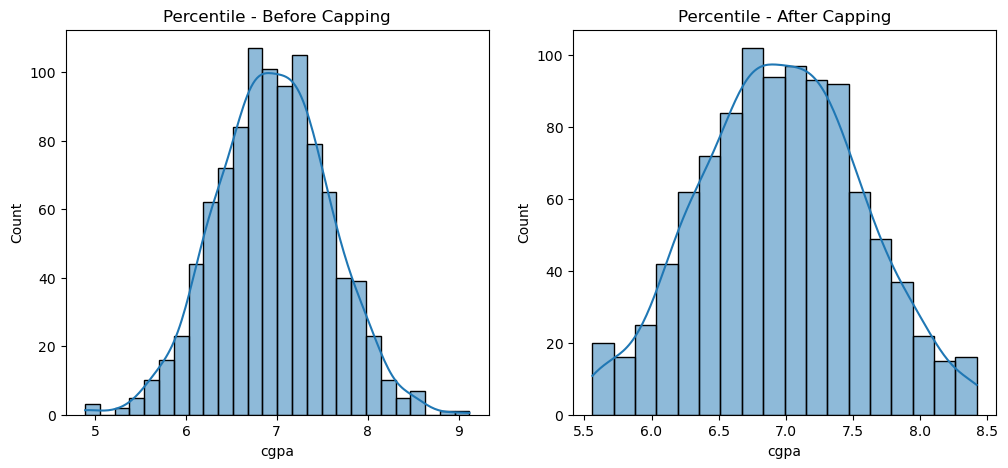

In [227]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde = True)
plt.title("Percentile - Before Capping")

plt.subplot(1,2,2)
sns.histplot(df_3b['cgpa'], kde = True)
plt.title("Percentile - After Capping")

### Box plot

Text(0.5, 1.0, 'Percentile - After Capping')

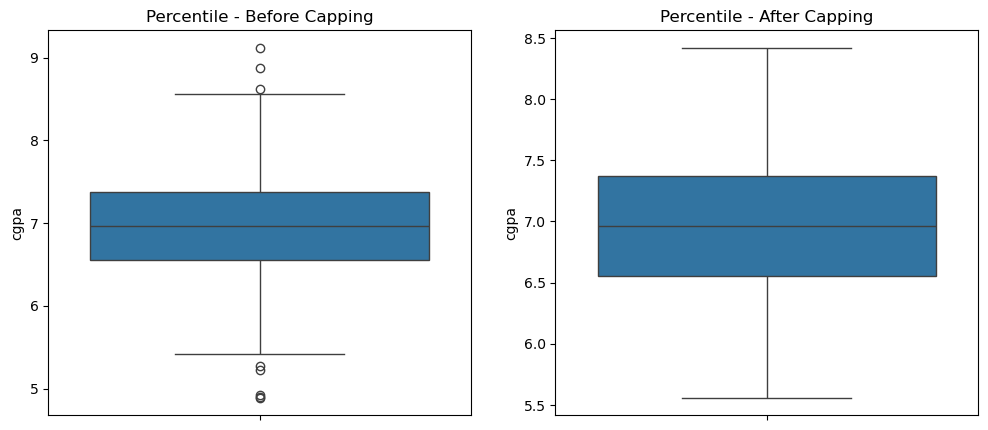

In [228]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
sns.boxplot(df['cgpa'])
plt.title("Percentile - Before Capping")

plt.subplot(1,2,2)
sns.boxplot(df_3b['cgpa'])
plt.title("Percentile - After Capping")